## Libraries

In [ ]:
!pip install --upgrade dcor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 805.7 kB/s eta 0:00:00


In [ ]:
!pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187013 sha256=efb66ae23ca41ae2d4b355cb0664ab1f1bcef8d23fc381f0ed8a2ceece5c38dc
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [ ]:
import numpy as np
import pandas as pd
import random

#saves variables
import pickle
#saves into files
from numpy import savetxt

# # MIC correlation
# from minepy import MINE

# # distance correlation
# import dcor
from scipy.spatial.distance import correlation


import matplotlib.pyplot  as plt
import seaborn as sns
# sns.set()

# LSTM
from keras import metrics
import keras
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

from scipy.stats import multivariate_normal

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import sys
# Append the directory to your python path using sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Correlation-Based-AD-HAI-HIL dataset ')
import model128
from model128 import ADClass

## Import Data

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/'

/content/drive/My Drive/Colab Notebooks


In [ ]:

dataset_path = '/content/drive/My Drive/Colab Notebooks/'
HAI_attack = 'test1.xlsx'
HAI_normal_v1= 'train1.xlsx'


In [ ]:
AD_normal = ADClass(dataset_path)
AD_attack = ADClass(dataset_path)

In [ ]:
# import normal data
df = AD_normal.importDataset(file_name = HAI_normal_v1, nb_rows = 0)

In [ ]:
# Get first n rows using values[] attribute
df = df.iloc[:20000]

In [ ]:
df.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32,0.0,28.9981,35.7395,0.0,...,64.4604,57.8704,395.0195,-0.0004,330.6568,328.9388,50.9871,9973,27629,normal
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32,0.0,29.9914,35.7388,0.0,...,64.7208,58.4853,398.3109,-0.0012,330.2228,329.3728,50.9871,9973,27629,normal
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32,0.0,27.0122,35.7399,0.0,...,64.9450,59.2629,397.8768,0.0018,332.0493,329.7526,50.9871,9973,27629,normal
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32,0.0,32.9705,35.7452,0.0,...,65.1620,59.8235,398.6364,0.0033,331.5249,331.0547,50.9871,9973,27629,normal
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32,0.0,30.9843,35.7422,0.0,...,65.4369,60.3118,401.2406,0.0015,333.1706,331.1631,50.9871,9973,27629,normal


In [ ]:
# import attack data
df_an = AD_attack.importDataset(file_name = HAI_attack, nb_rows = 0)

In [ ]:
# Get first n rows using values[] attribute
df_an = df_an.iloc[:20000]

In [ ]:
# df.iloc[:,:12]
df_an.head(3)

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-10-29 11:00:00,0.0982,1.4610,461.9883,1099.7363,32.0,0.0,113.4112,35.9070,9.2526,...,70.2402,67.2924,426.6312,-0.0027,355.4688,349.6998,0,10053.0,27629,normal
1,2019-10-29 11:00:01,0.0982,1.4578,461.9883,1099.7363,32.0,0.0,116.3903,35.8990,9.2161,...,70.3776,67.6722,426.5046,-0.0020,356.8432,349.8625,0,10053.0,27629,normal
2,2019-10-29 11:00:02,0.0982,1.4666,461.9883,1099.7363,32.0,0.0,116.3903,35.9211,9.8404,...,70.5295,67.9073,427.9875,-0.0019,357.1868,350.4413,0,10053.0,27629,normal


### Split data

In [ ]:
# Split data from labels
x_n, y_n = AD_normal.splitDataset(df)

In [ ]:
x_n_an, y_n_an = AD_attack.splitDataset(df_an)

In [ ]:
# remove date column
x_n.drop('time', axis=1, inplace=True)

In [ ]:
x_n_an.drop('time', axis=1, inplace=True)

# EDA

<ipython-input-286-00697c75cf0b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(df.corr(),


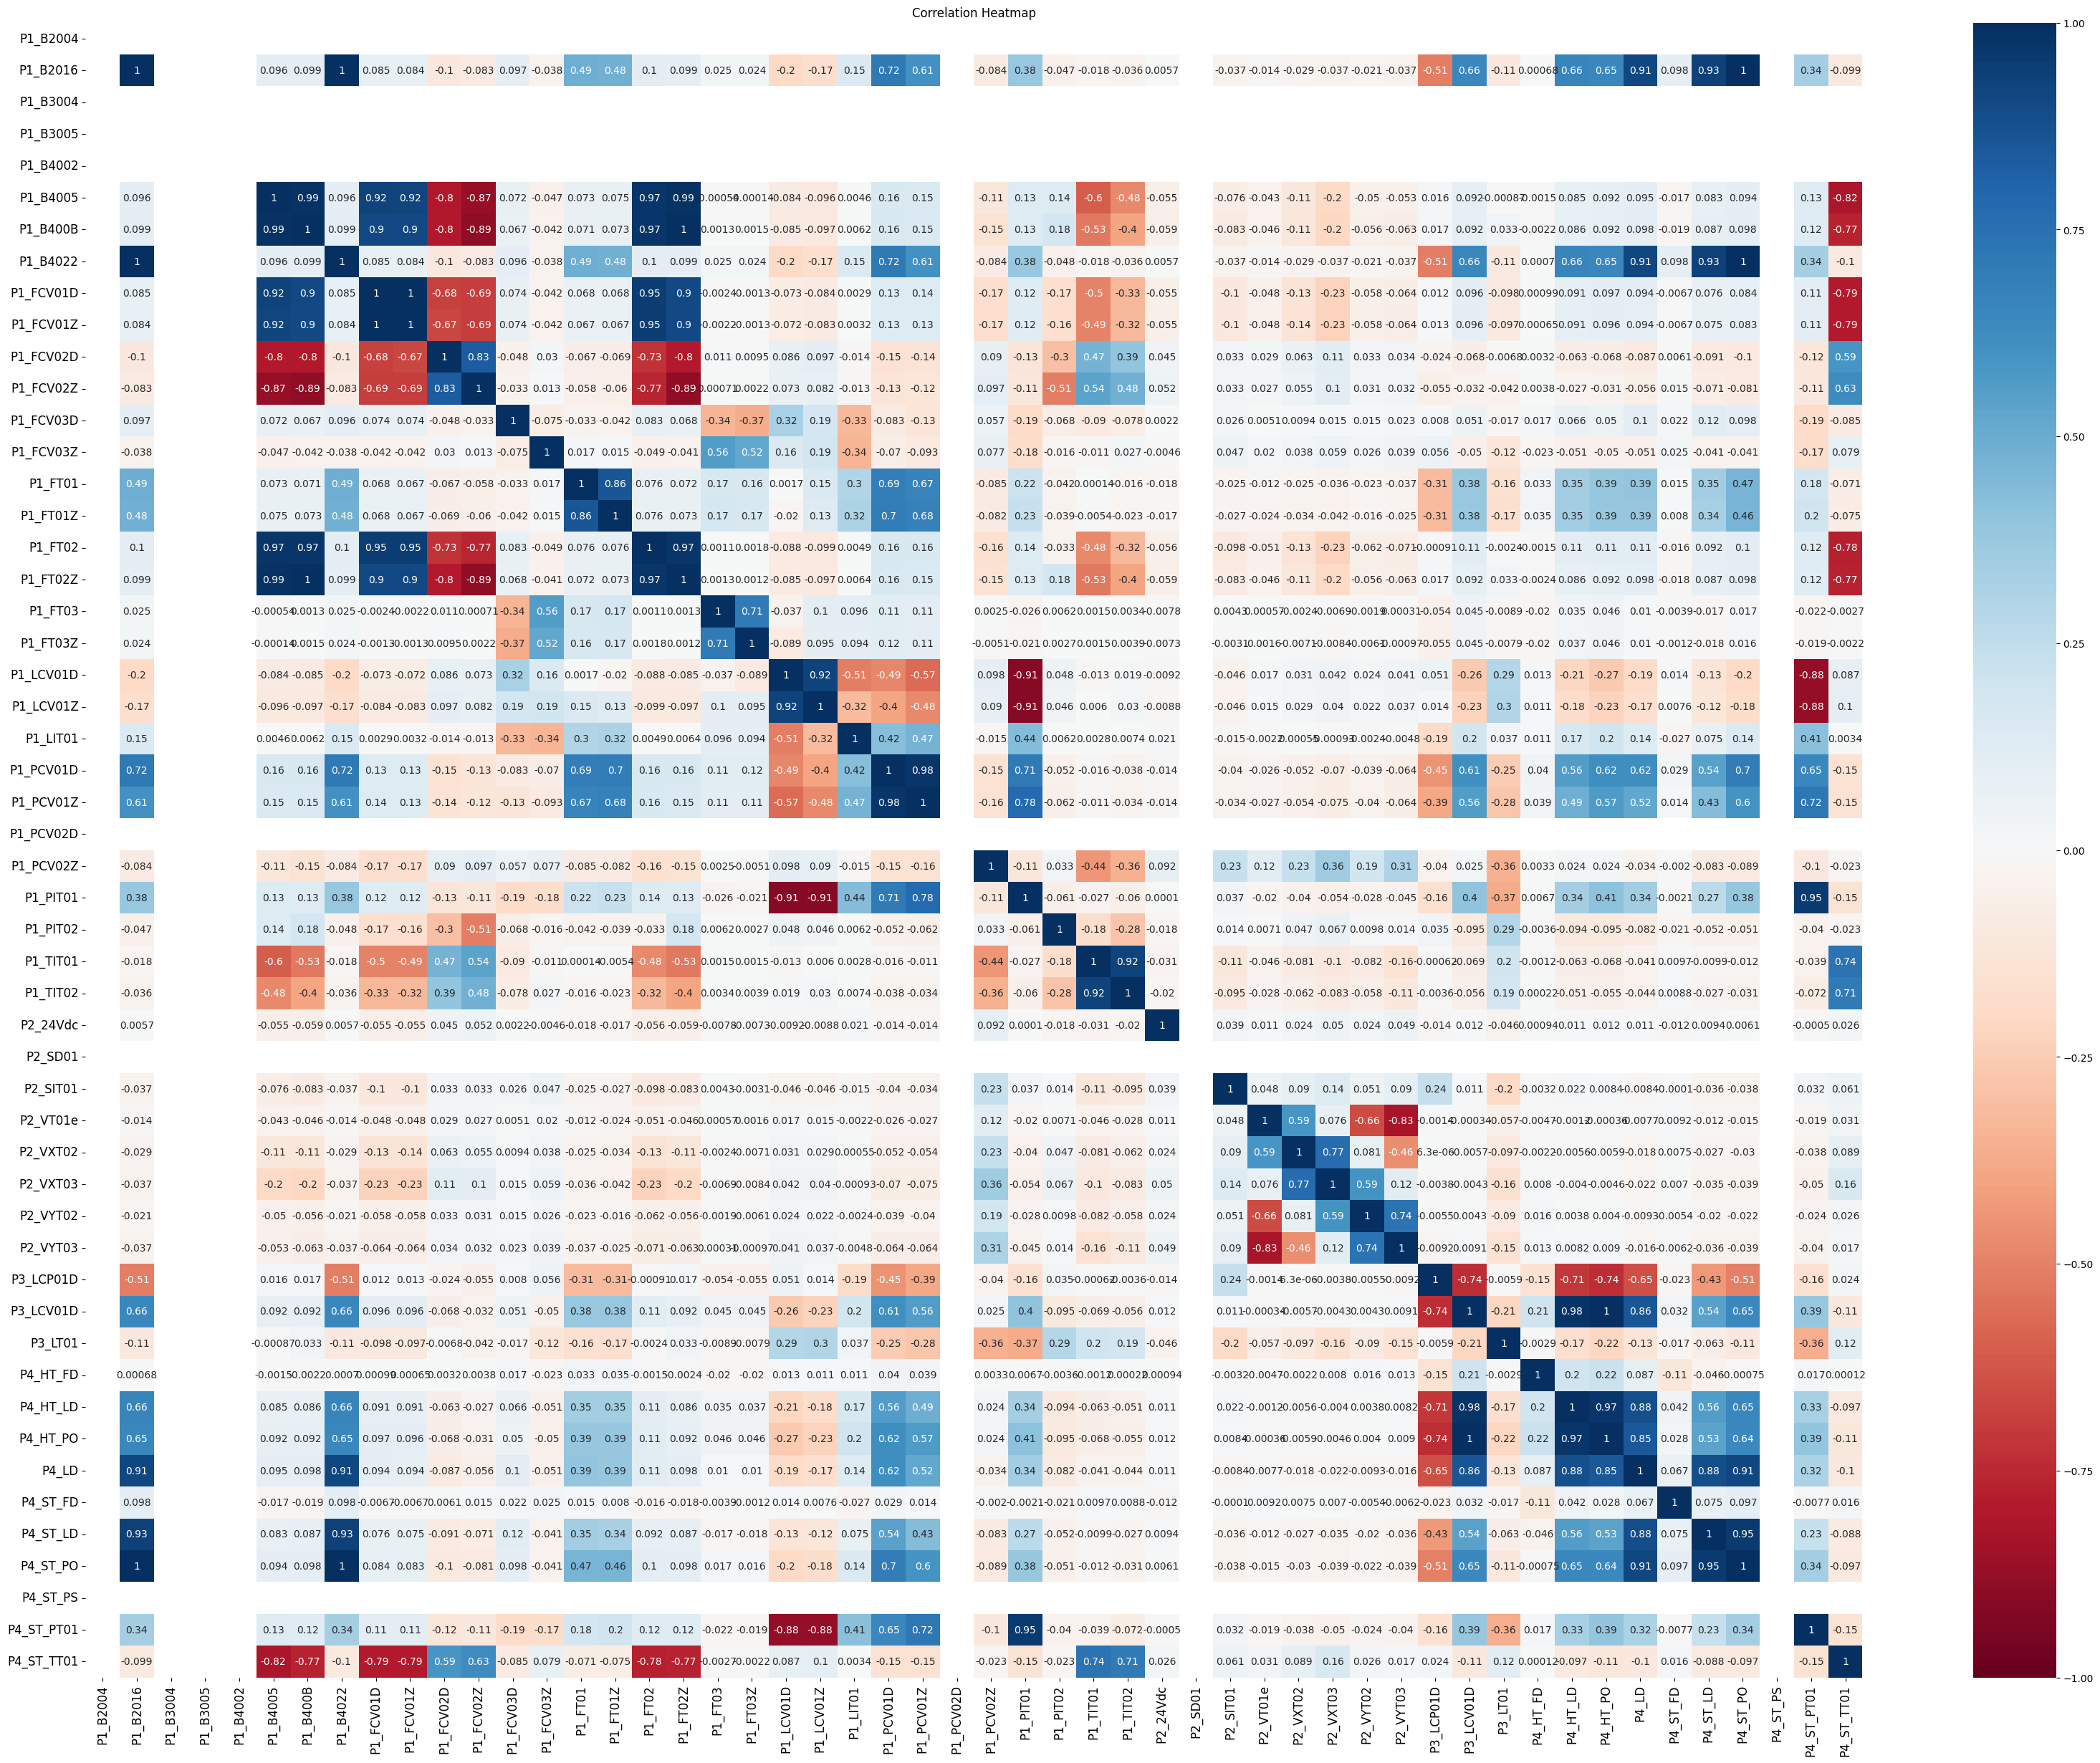

In [ ]:
# Create correlation matrix
corr_mat = x_n_an.corr(method='pearson')

# Print the graph
plt.figure(figsize = (40, 30))
s = sns.heatmap(df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

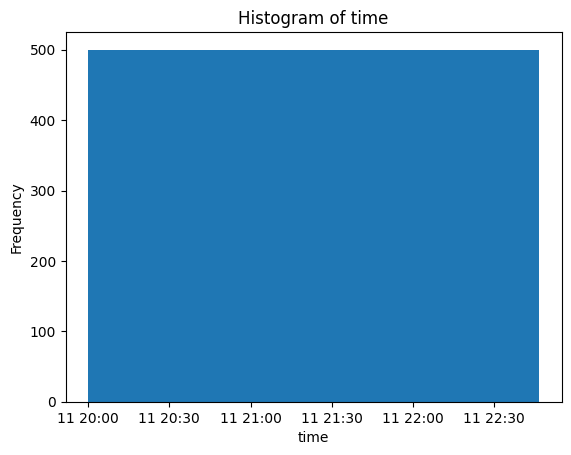

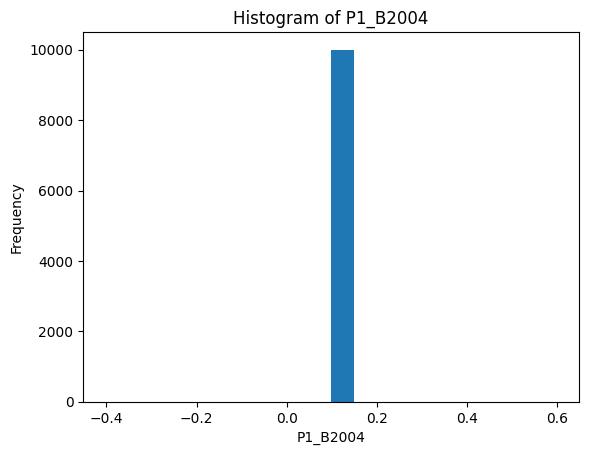

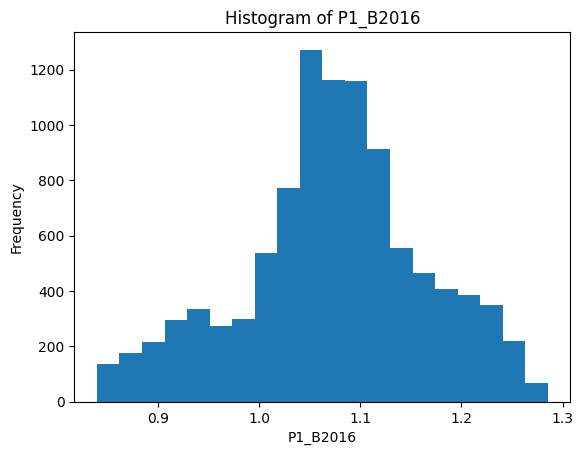

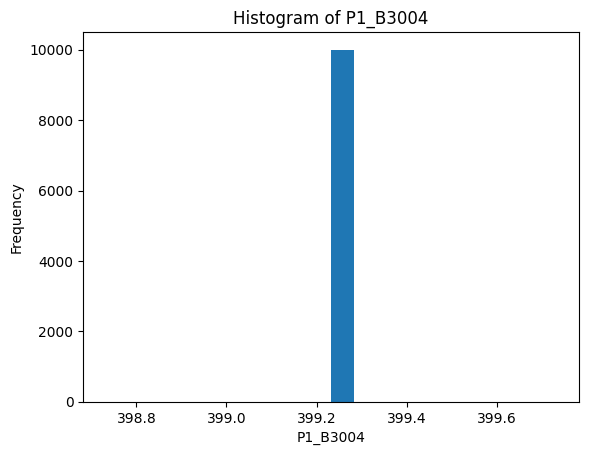

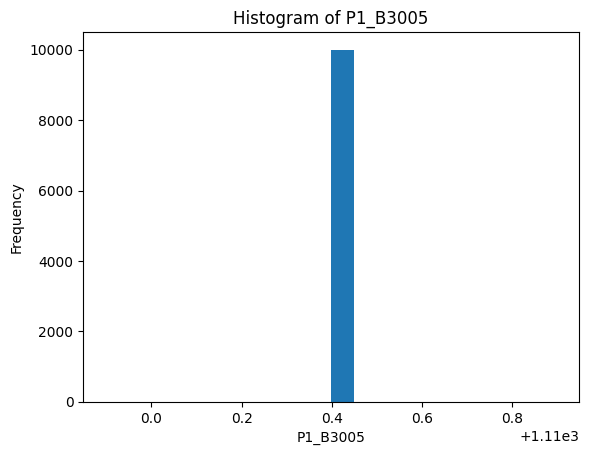

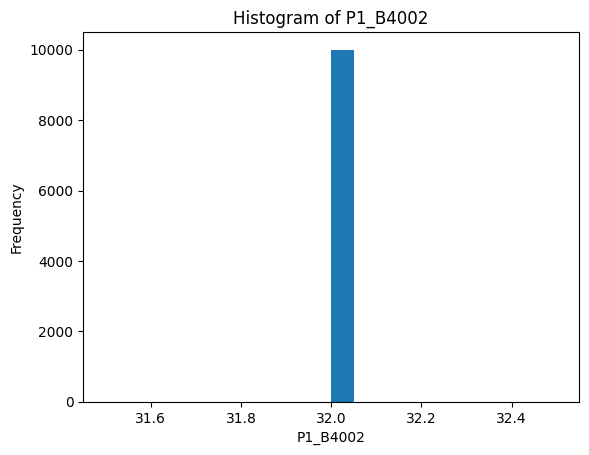

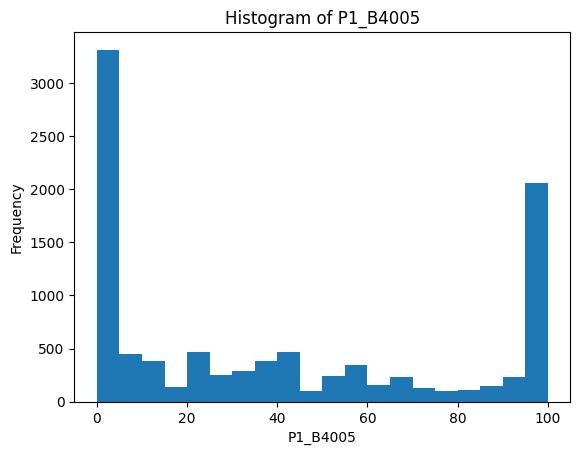

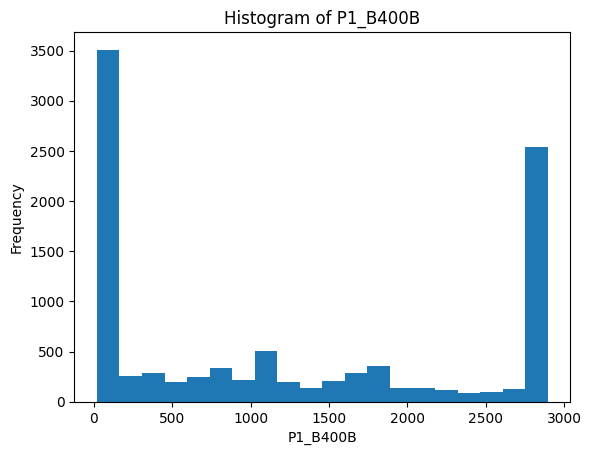

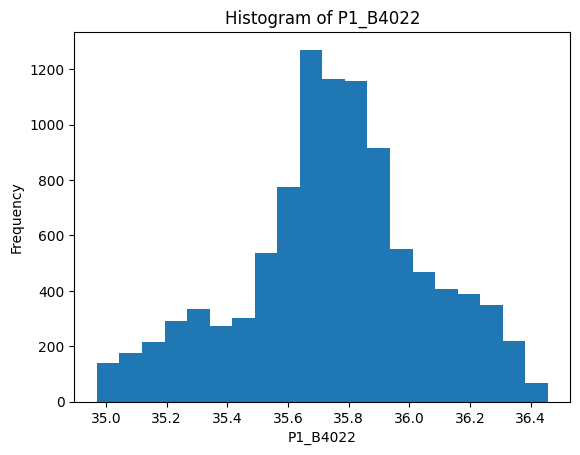

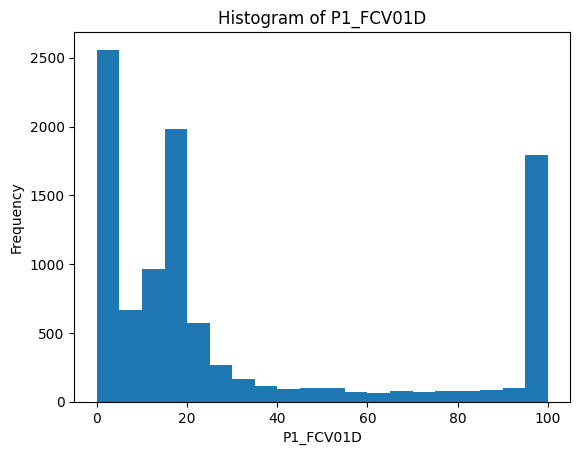

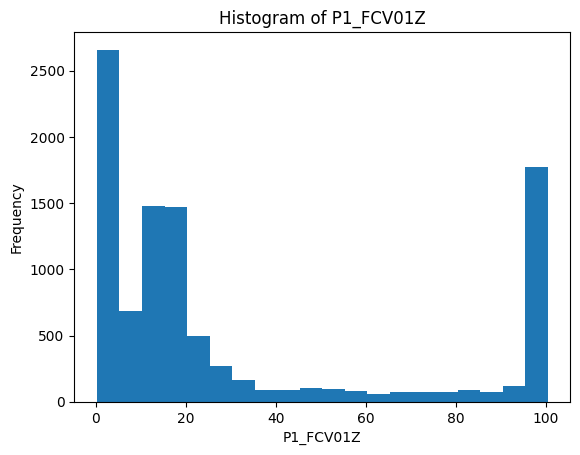

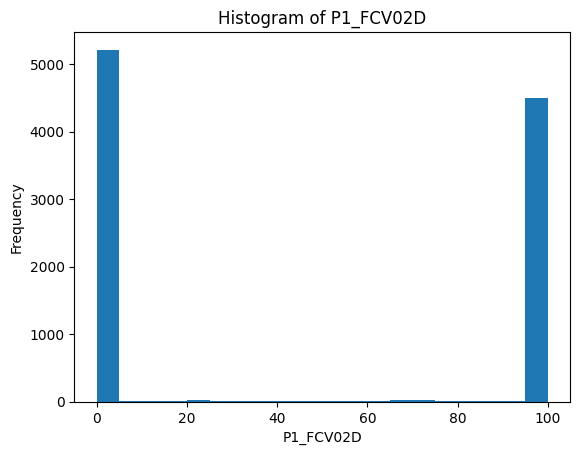

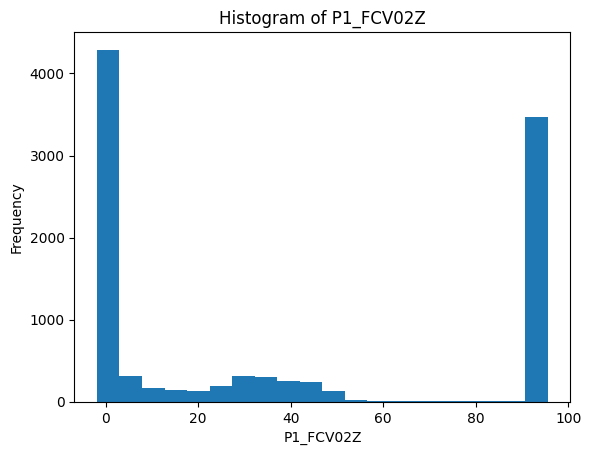

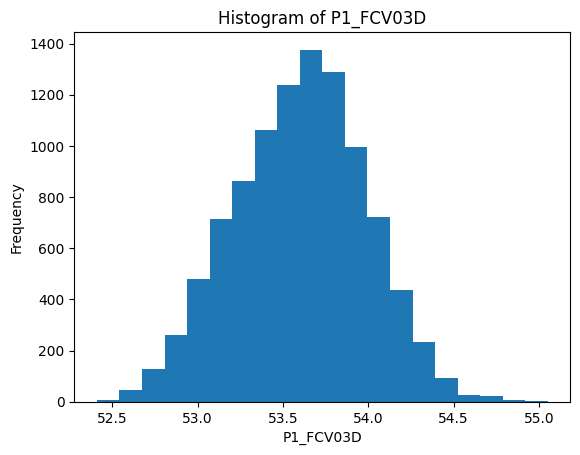

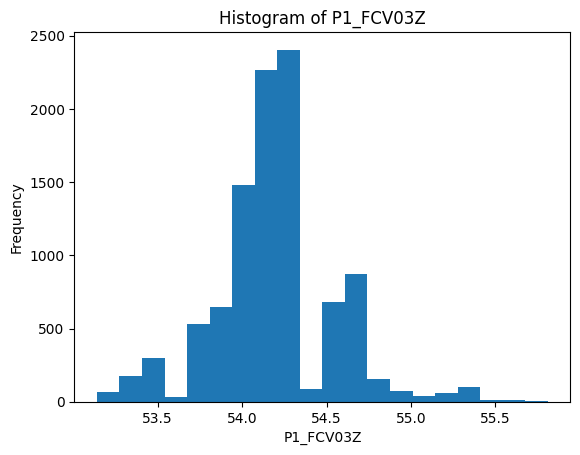

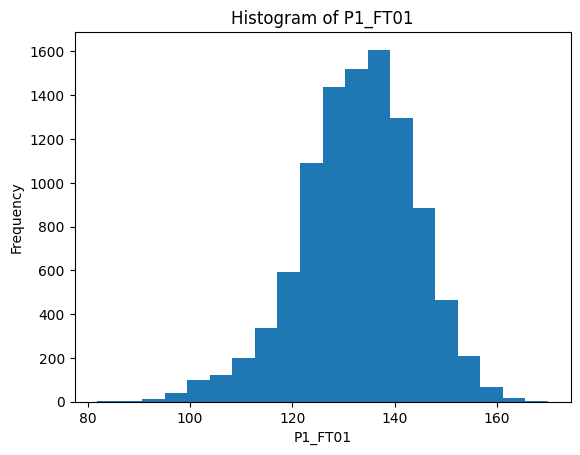

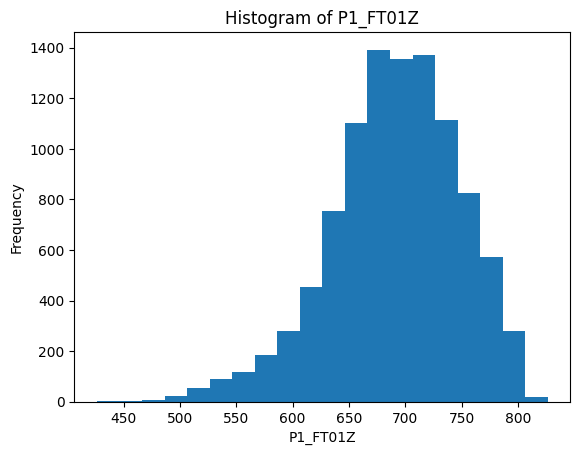

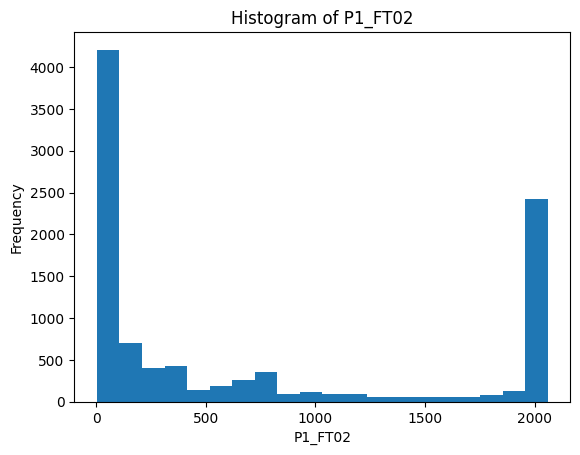

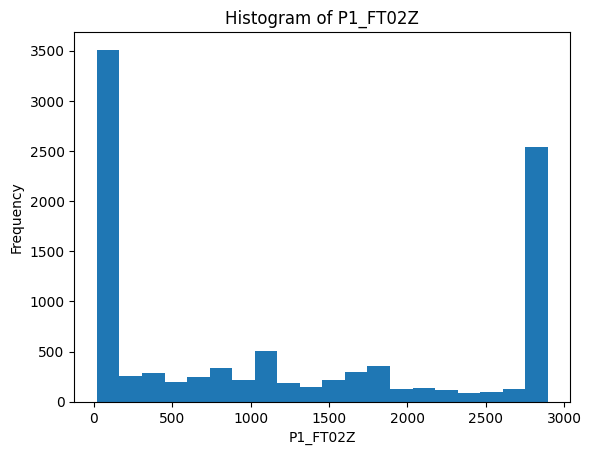

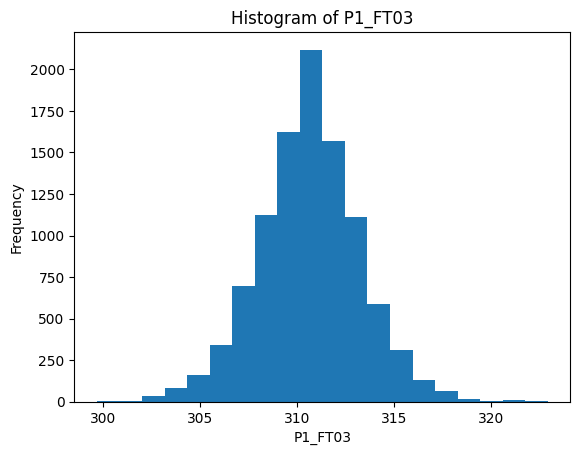

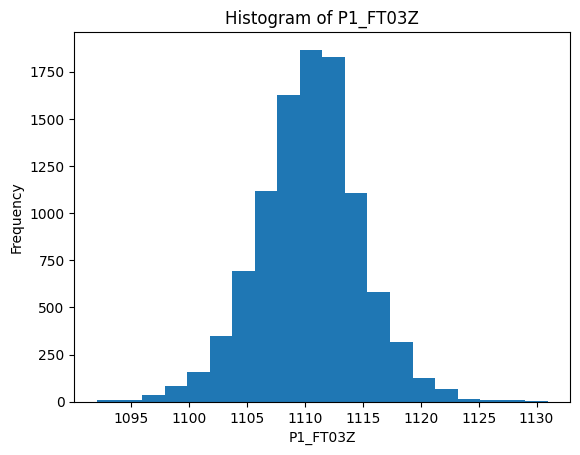

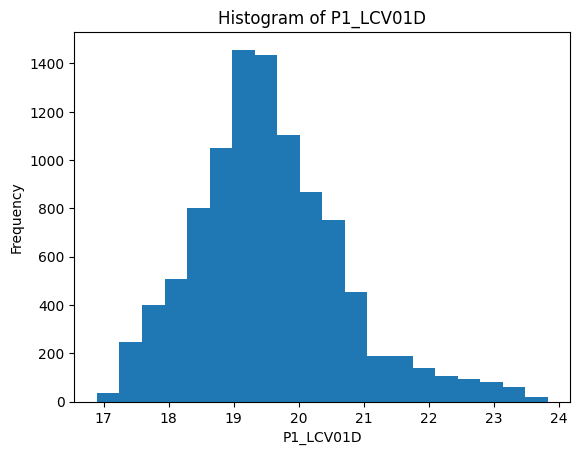

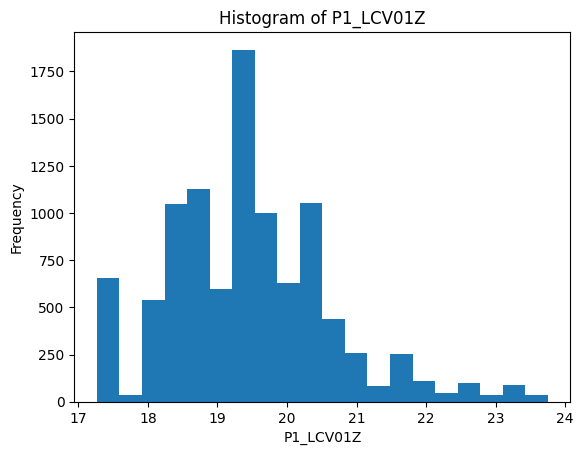

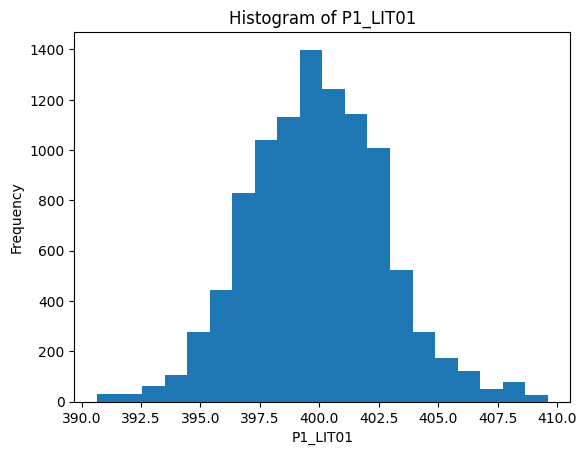

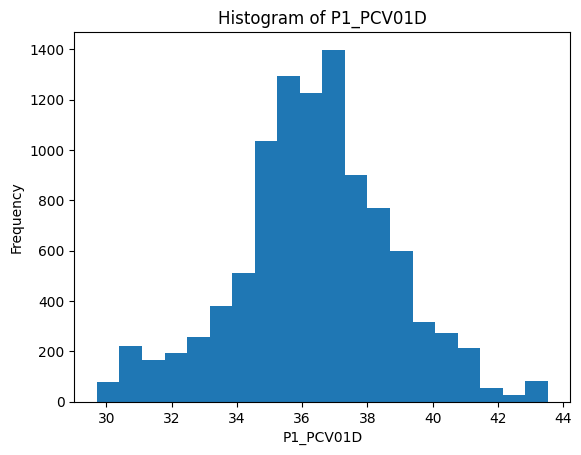

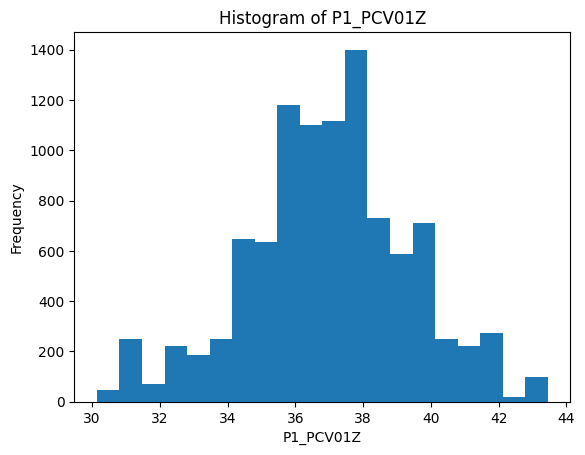

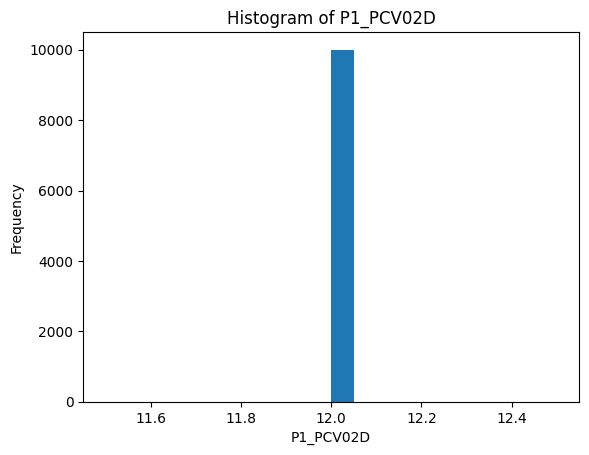

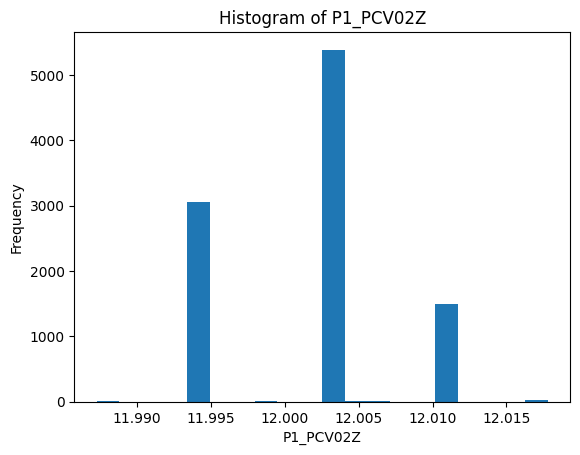

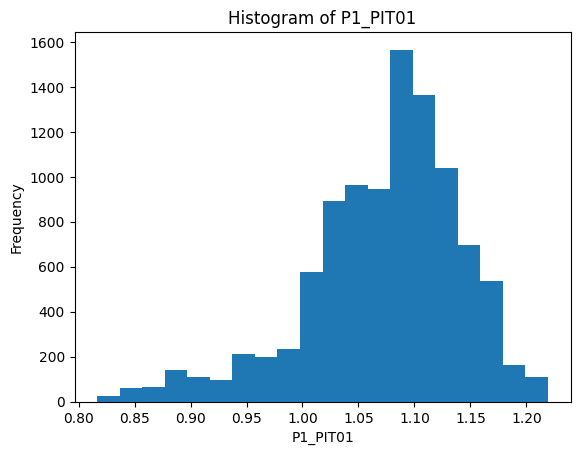

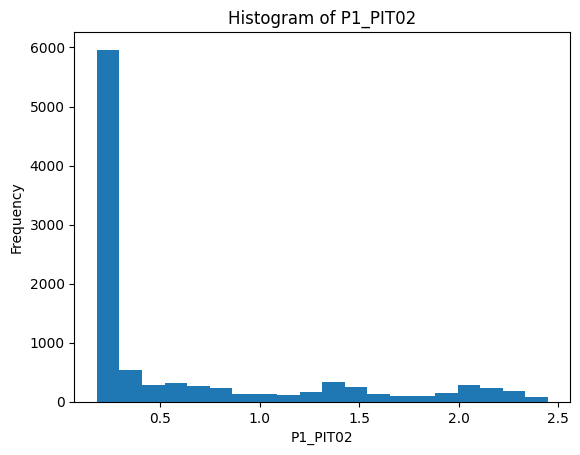

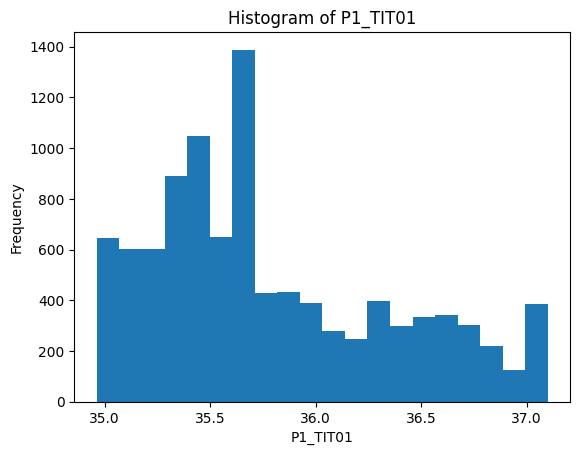

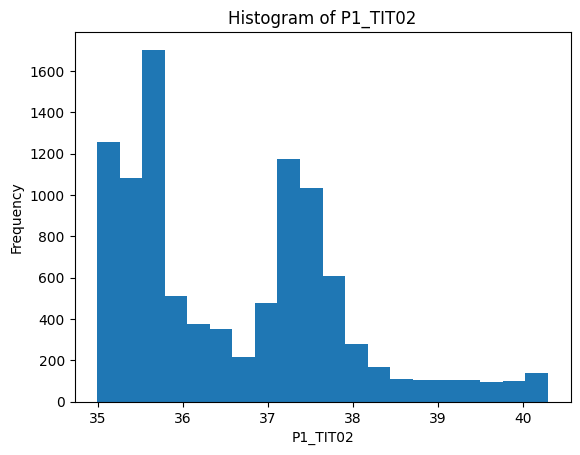

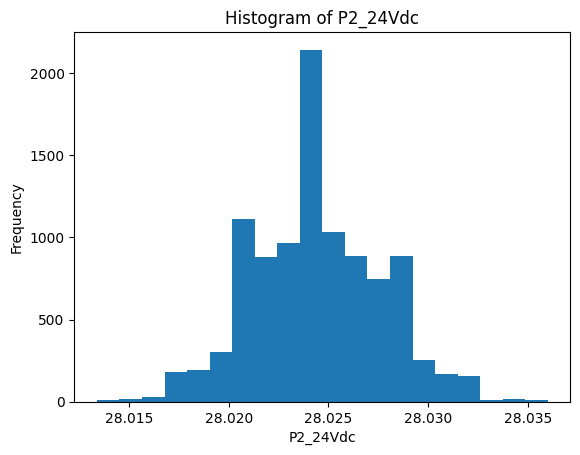

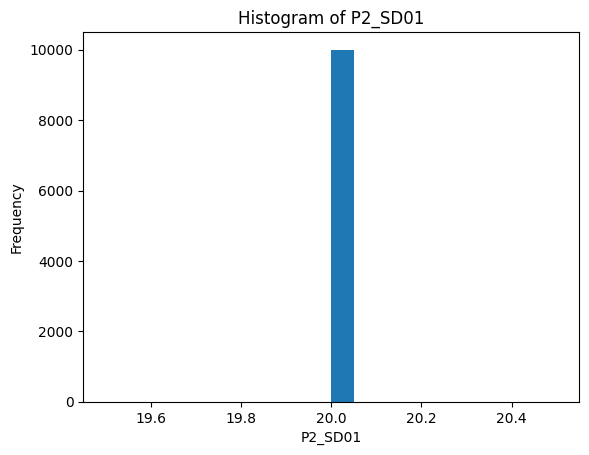

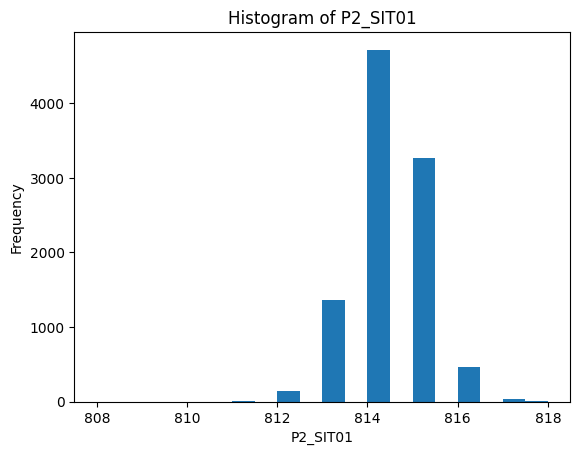

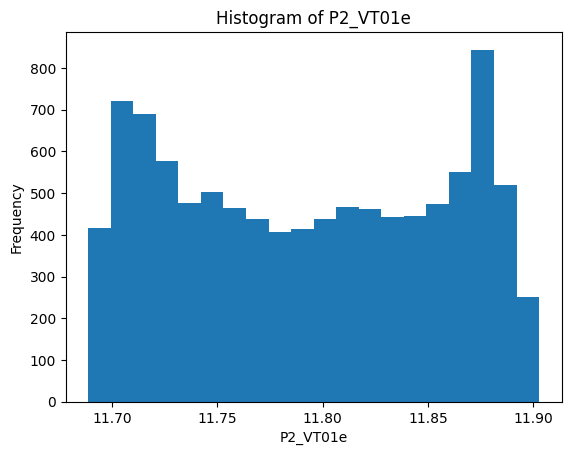

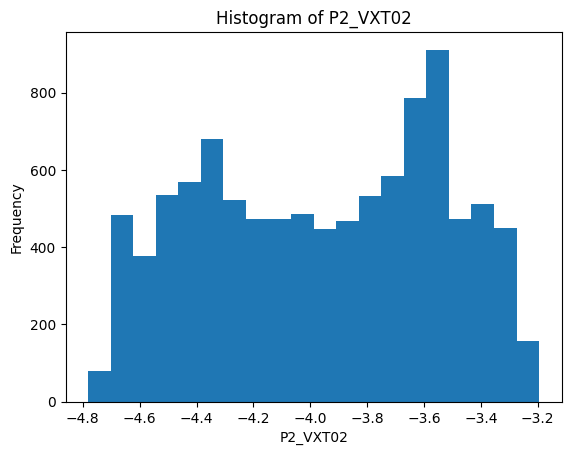

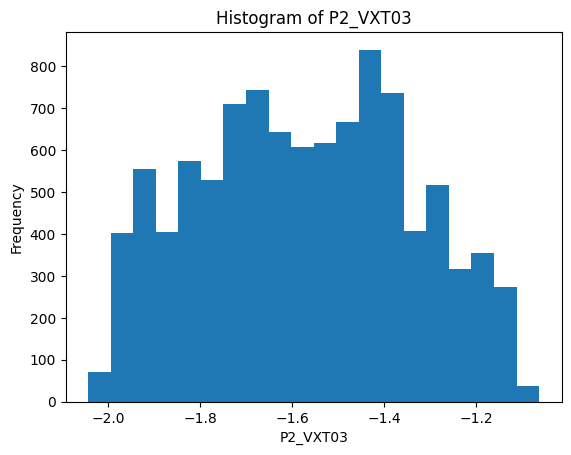

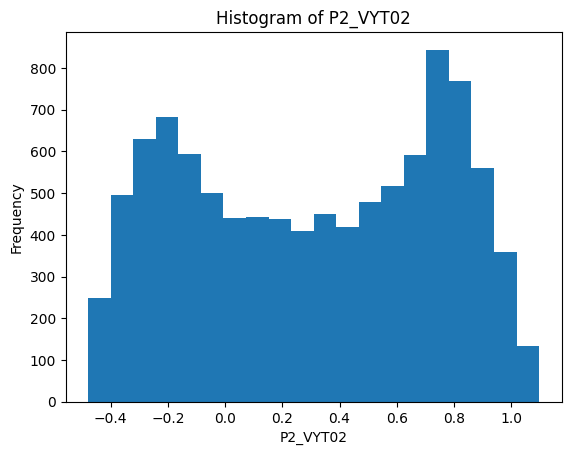

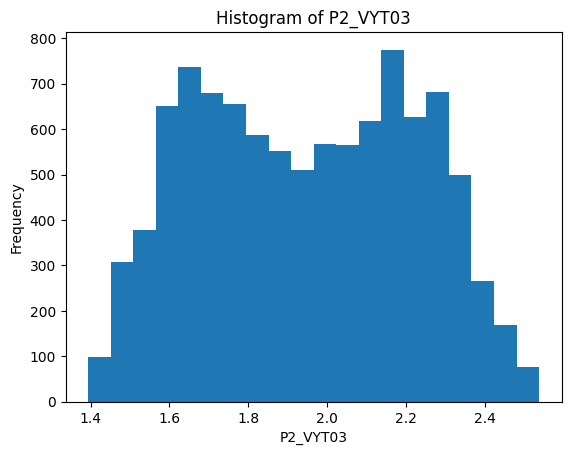

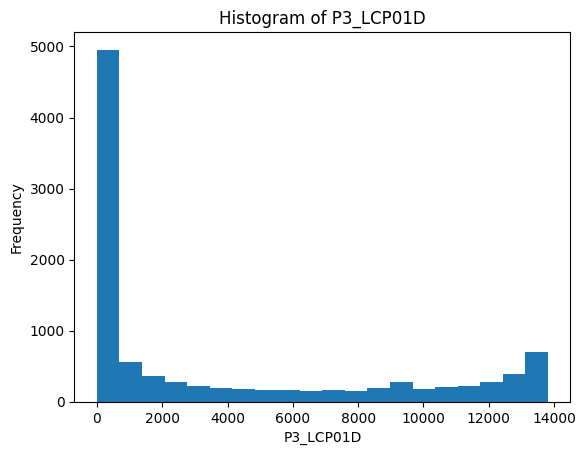

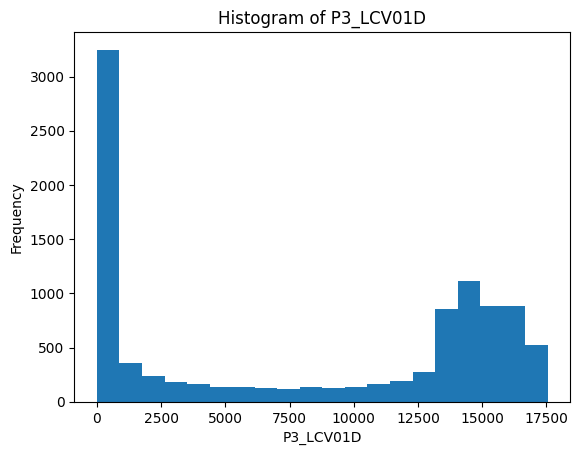

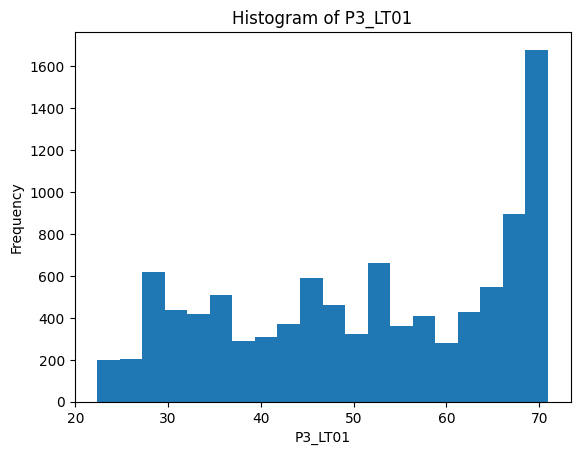

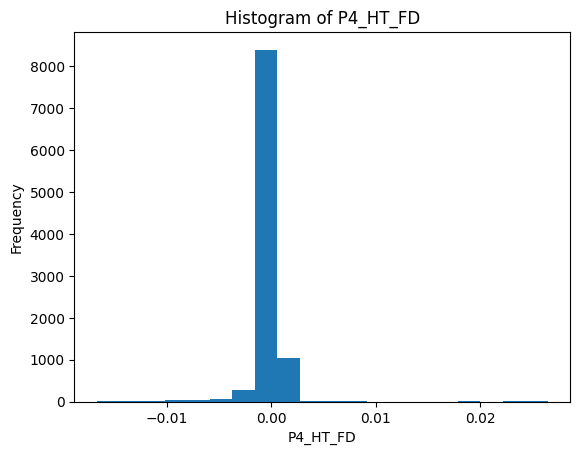

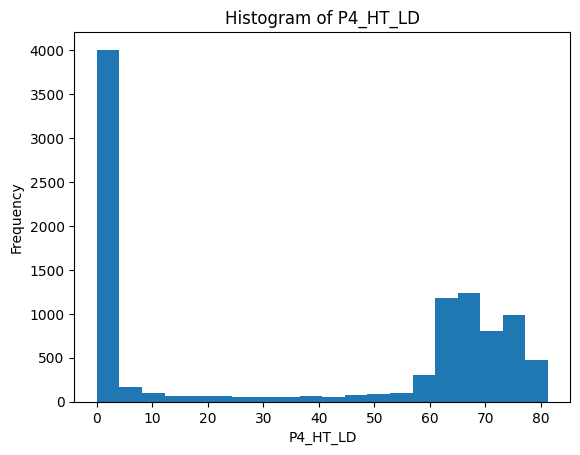

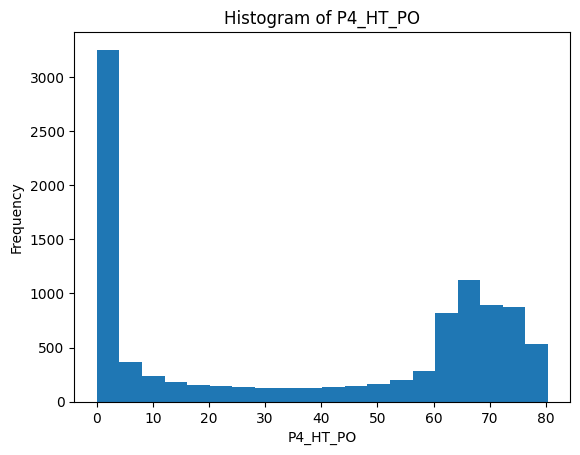

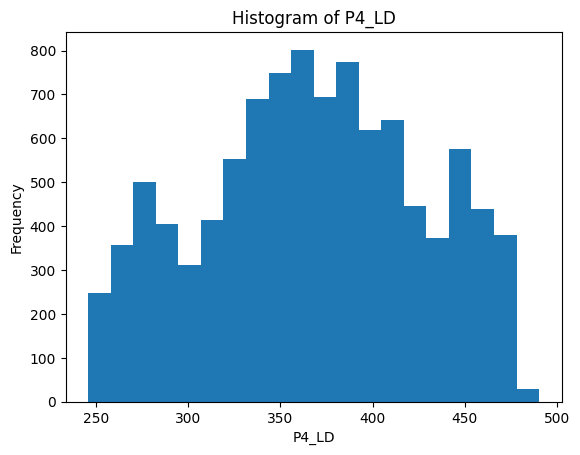

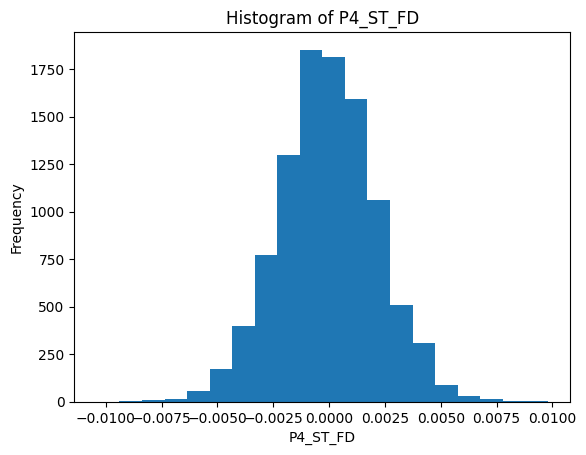

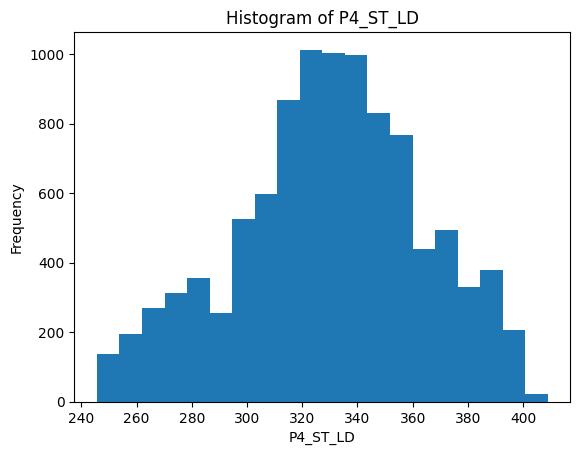

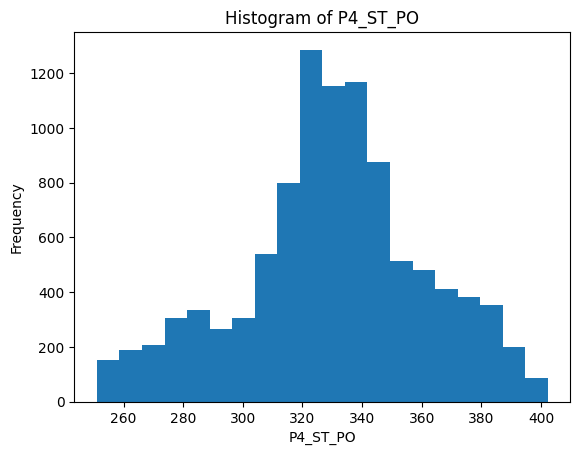

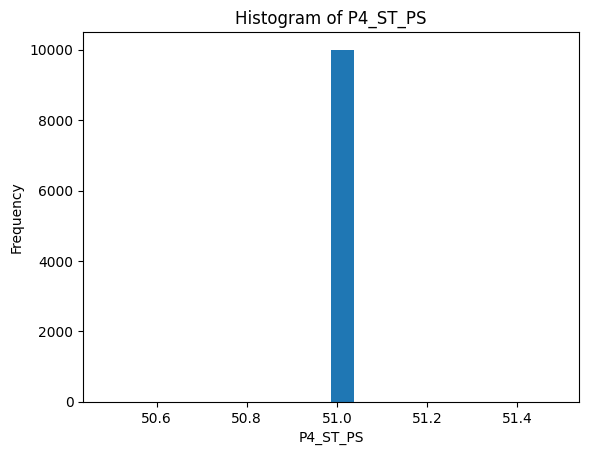

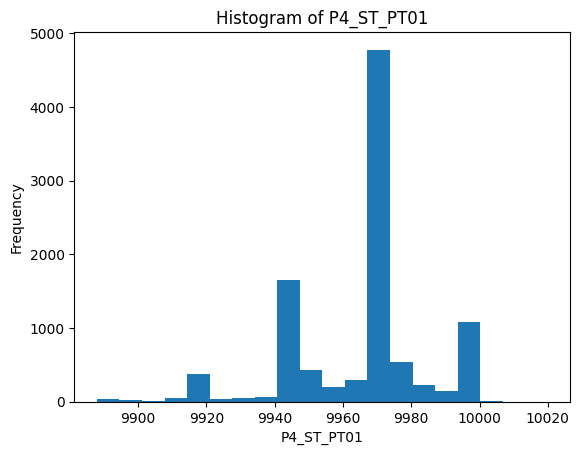

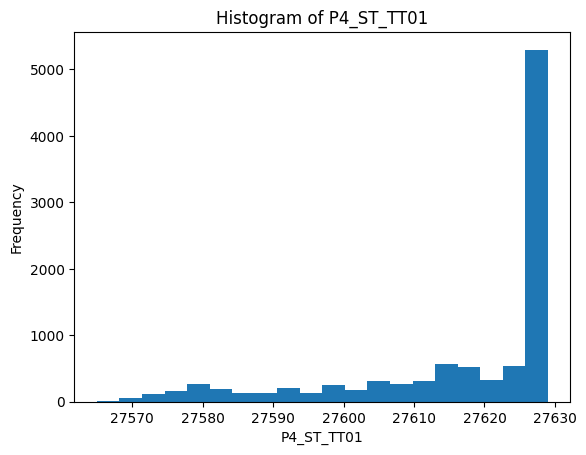

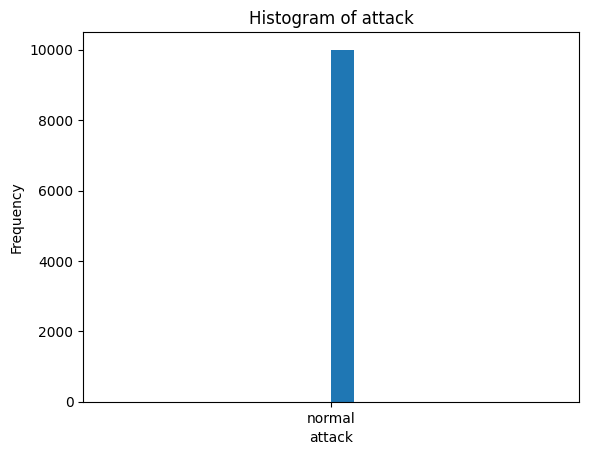

In [ ]:
df_his = df.iloc[:10000,:]

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a histogram plot for the current column
    plt.hist(df_his[column], bins=20)  # Create a histogram with 20 bins
    plt.xlabel(column)  # Set the x-axis label as the column name
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.title(f'Histogram of {column}')  # Set the title of the plot
    plt.show()  # Show the histogram plot

## Standardization

In [ ]:
scaler_std = StandardScaler()
x_n_scaled = scaler_std.fit_transform(x_n)
x_n_an_scaled = scaler_std.fit_transform(x_n_an)
print(x_n_scaled)

[[-2.77555756e-17 -3.38614713e-02 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17 -3.71629552e-02 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17 -3.27609767e-02 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 ...
 [-2.77555756e-17  1.85136959e-01 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17  1.64227561e-01 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17  2.19252293e-01 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]]


In [ ]:
x_n_scaled.shape

(10000, 52)

In [ ]:
# Convert ndarray to pandas DataFrame
df_x_n_scaled = pd.DataFrame(x_n_scaled)
df_x_n_an_scaled = pd.DataFrame(x_n_an_scaled)

In [ ]:
from scipy.stats import pearsonr
import itertools
import math

# Initialize an empty dictionary to store the Pearson correlation coefficients
pearson_dict = {}

# Compute Pearson correlation coefficients for all pairs of features
for col1, col2 in itertools.combinations(df_x_n_scaled.columns, 2):
    # Compute Pearson correlation coefficient for the current pair of features
    corr, _ = pearsonr(df_x_n_scaled[col1], df_x_n_scaled[col2])
    pearson_dict[f"{col1}-{col2}"] = abs(corr)  # Store the absolute correlation coefficient

# Remove NaN values using a loop
pearson_dict_without_nan = {}
for k, v in pearson_dict.items():
    if not isinstance(v, float) or not math.isnan(v):
        pearson_dict_without_nan[k] = v


# Sort the Pearson correlation coefficients in descending order
sorted_pearson = sorted(pearson_dict_without_nan.items(), key=lambda x: x[1], reverse=True)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
sorted_pearson

[('1-7', 0.9999642393952327),
 ('8-9', 0.9992650436225863),
 ('40-44', 0.9990247718679108),
 ('6-17', 0.9989318744628652),
 ('1-48', 0.9971630157537982),
 ('7-48', 0.9971316047702338),
 ('5-17', 0.9899556847959357),
 ('5-6', 0.9898475450141746),
 ('40-43', 0.9775167987152269),
 ('23-24', 0.9764710229847979),
 ('16-17', 0.9723531501315243),
 ('5-16', 0.971850460165411),
 ('6-16', 0.9711775168659202),
 ('43-44', 0.9698613679728896),
 ('47-48', 0.9543897610491994),
 ('27-50', 0.9537005799980223),
 ('9-16', 0.9526646521243758),
 ('8-16', 0.9512932997241412),
 ('1-47', 0.9347715991726484),
 ('7-47', 0.9345649693132523),
 ('29-30', 0.9242344336994643),
 ('20-21', 0.9226804209439406),
 ('5-8', 0.9226722088756839),
 ('5-9', 0.9215665915491353),
 ('45-48', 0.9130921627904667),
 ('21-27', 0.9115281560828771),
 ('20-27', 0.906684409142318),
 ('1-45', 0.9062932476926524),
 ('7-45', 0.9062655799794566),
 ('9-17', 0.9040914820791937),
 ('6-8', 0.9035771188372022),
 ('6-9', 0.903275978746528),
 ('8-1

In [ ]:
# Select feature pairs based on a threshold correlation coefficient
threshold = 0.6  # Set your desired threshold value here
selected_feature_pairs = [(pair.split('-')[0], pair.split('-')[1]) for pair, corr in sorted_pearson if corr >= threshold]

In [ ]:
selected_feature_pairs

[('1', '7'),
 ('8', '9'),
 ('40', '44'),
 ('6', '17'),
 ('1', '48'),
 ('7', '48'),
 ('5', '17'),
 ('5', '6'),
 ('40', '43'),
 ('23', '24'),
 ('16', '17'),
 ('5', '16'),
 ('6', '16'),
 ('43', '44'),
 ('47', '48'),
 ('27', '50'),
 ('9', '16'),
 ('8', '16'),
 ('1', '47'),
 ('7', '47'),
 ('29', '30'),
 ('20', '21'),
 ('5', '8'),
 ('5', '9'),
 ('45', '48'),
 ('21', '27'),
 ('20', '27'),
 ('1', '45'),
 ('7', '45'),
 ('9', '17'),
 ('6', '8'),
 ('6', '9'),
 ('8', '17'),
 ('11', '17'),
 ('6', '11'),
 ('45', '47'),
 ('43', '45'),
 ('21', '50'),
 ('20', '50'),
 ('5', '11'),
 ('40', '45'),
 ('14', '15'),
 ('44', '45'),
 ('10', '11'),
 ('34', '38'),
 ('5', '51'),
 ('6', '10'),
 ('5', '10'),
 ('10', '17'),
 ('8', '51'),
 ('9', '51'),
 ('24', '27'),
 ('16', '51'),
 ('35', '36'),
 ('17', '51'),
 ('6', '51'),
 ('11', '16'),
 ('39', '44'),
 ('37', '38'),
 ('29', '51'),
 ('39', '40'),
 ('10', '16'),
 ('24', '50'),
 ('7', '23'),
 ('1', '23'),
 ('30', '51'),
 ('39', '43'),
 ('18', '19'),
 ('23', '27'),
 ('

In [ ]:
# Extract the feature names from the selected feature pairs
selected_features = set([feature for pair in selected_feature_pairs for feature in pair])

In [ ]:
# Convert the selected feature names from strings to numeric format
selected_features_numeric = [float(feature) for feature in selected_features]

# Sort the selected feature names in ascending order
selected_features_numeric.sort()  # To sort in descending order, use selected_features_numeric.sort(reverse=True)

# Filter the DataFrame to keep only the selected features
df_x_n_scaled[selected_features_numeric]

,1,5,6,7,8,9,10,11,14,15,...,38,39,40,43,44,45,47,48,50,51
0,-0.033861,-1.025908,-1.042487,-0.034301,-0.871182,-0.858391,1.085814,1.302921,0.012282,0.351754,...,-0.487396,-0.541963,0.670301,0.814409,0.653245,0.466252,0.024202,-0.036424,0.319769,0.729475
1,-0.037163,-1.025908,-1.041635,-0.036612,-0.871182,-0.858391,1.085814,1.301345,-0.226174,0.022016,...,1.928169,-0.554189,0.691268,0.822236,0.672815,0.521627,0.011483,-0.022411,0.319769,0.729475
2,-0.032761,-1.025908,-1.044191,-0.032980,-0.871182,-0.858185,1.085814,1.301345,0.165573,-0.220947,...,-0.299543,-0.564988,0.710051,0.828975,0.697564,0.514324,0.065011,-0.010147,0.319769,0.729475
3,-0.015153,-1.025908,-1.039079,-0.015481,-0.871182,-0.858597,1.085814,1.301520,0.080417,0.178207,...,0.946755,-0.575176,0.727815,0.835497,0.715406,0.527104,0.049643,0.031896,0.319769,0.729475
4,-0.025058,-1.025908,-1.040783,-0.025386,-0.871182,-0.858391,1.085814,1.301520,-0.089912,0.091434,...,0.990720,-0.585568,0.745142,0.843760,0.730947,0.570917,0.097871,0.035396,0.319769,0.729475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.242363,-1.025908,-1.037375,0.242718,-0.871182,-0.858391,1.085814,1.302747,0.029320,-0.220947,...,-0.775898,-0.772217,0.951028,0.900730,0.951965,0.614122,0.194329,0.221672,0.319769,0.729475
9996,0.201644,-1.025908,-1.042487,0.201446,-0.871182,-0.858391,1.085814,1.301872,-0.549786,0.039374,...,-0.738472,-0.772217,0.951464,0.900730,0.951965,0.615947,0.226126,0.215250,0.319769,0.729475
9997,0.185137,-1.025908,-1.039931,0.184937,-0.871182,-0.858391,1.085814,1.302221,-0.175077,-0.550678,...,0.439515,-0.772829,0.951464,0.900730,0.951965,0.623249,0.206517,0.201236,0.319769,0.729475
9998,0.164228,-1.025908,-1.039931,0.164796,-0.871182,-0.858391,1.085814,1.303624,-0.856368,-0.168883,...,-1.554925,-0.772829,0.952047,0.900730,0.951965,0.599517,0.161999,0.210581,0.319769,0.729475


In [ ]:
print(x_n_scaled)
print(len(x_n_scaled))

[[-2.77555756e-17 -3.38614713e-02 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17 -3.71629552e-02 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17 -3.27609767e-02 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 ...
 [-2.77555756e-17  1.85136959e-01 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17  1.64227561e-01 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]
 [-2.77555756e-17  2.19252293e-01 -1.13686838e-13 ... -1.42108547e-14
   3.19769026e-01  7.29474956e-01]]
10000


In [ ]:
x_n_scaled = df_x_n_scaled[selected_features_numeric].values

In [ ]:
x_n_an_scaled = df_x_n_an_scaled[selected_features_numeric].values

In [ ]:
print(x_n_scaled)
print(len(x_n_scaled))

[[-0.03386147 -1.02590783 -1.04248742 ... -0.03642409  0.31976903
   0.72947496]
 [-0.03716296 -1.02590783 -1.04163519 ... -0.02241063  0.31976903
   0.72947496]
 [-0.03276098 -1.02590783 -1.04419129 ... -0.01014725  0.31976903
   0.72947496]
 ...
 [ 0.18513696 -1.02590783 -1.03993107 ...  0.20123633  0.31976903
   0.72947496]
 [ 0.16422756 -1.02590783 -1.03993107 ...  0.21058078  0.31976903
   0.72947496]
 [ 0.21925229 -1.02590783 -1.04248742 ...  0.20766185  0.31976903
   0.72947496]]
10000


In [ ]:
x_n_scaled.shape

(10000, 35)

# Correlation Probabilistic Model

In [ ]:
window_size = 512
shift = 8

## Create the windowed data

In [ ]:
y_n_an.shape

(20000, 1)

In [ ]:
x_w_train = AD_normal.createSequence(x_n_scaled[:,:], window_size, shift)

In [ ]:
x_w_train_an = AD_normal.createSequence(x_n_an_scaled[:,:], window_size,  shift)
y_w_train_an = AD_normal.createSequence(y_n_an[:], window_size, shift)

In [ ]:
print (x_w_train.shape)
print(x_w_train_an.shape)

(1185, 512, 35)
(2435, 512, 35)


#### Create LCM and LCV within the loop directly from the windowed data

In [ ]:
# del df, df_an
# del x_n
# del x_n_an
# del x_n_scaled
# # del x_n_an_scaled

# del x_w_train
# # del x_w_train_an
# # del y_w_train_an
# del y_n
# # del y_n_an

### Calculate correlation

#### normal part

In [ ]:
#%cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/SWaT/pearson/w512_s8/training/'
# %cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/SWaT/pearson/w256_s8/training/'



%cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W512/training/'

/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W512/training


In [ ]:
LCVs = []
LCVs = AD_normal.calculateLCV(x_w_train[:50000,:,:])

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 



In [ ]:
# Open a file for writing
with open('LCVs_1.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs, f)

In [ ]:
LCVs = []
LCVs = AD_normal.calculateLCV(x_w_train[50000:,:,:])

In [ ]:
# Open a file for writing
with open('LCVs_2.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs, f)

In [ ]:
#del x_w_train

Load LCVs partitions

In [ ]:
# Load the pickle file
with open('LCVs_1.pickle', 'rb') as f:
    sample_normal_1 = pickle.load(f)

In [ ]:
# Load the pickle file
with open('LCVs_2.pickle', 'rb') as f:
    sample_normal_2 = pickle.load(f)

In [ ]:
LCVs = sample_normal_1 + sample_normal_2 #+ sample_normal_3 #+ sample_normal_4 + sample_normal_5 #+ sample_normal_6

In [ ]:
import gc

# ... code that creates objects ...
# del LCVs
del sample_normal_1, sample_normal_2#, sample_normal_3
# del sample_normal_4, sample_normal_5 , sample_normal_6

# Trigger garbage collection
gc.collect()

18081

In [ ]:
len(LCVs)

1185

#### anomaly part

In [ ]:
# %cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/SWaT/pearson/w256_s8/testing/'

%cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W512/testing/'



/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W512/testing


In [ ]:
# del x_w_train, LCVs

In [ ]:
LCVs_an_y = AD_normal.getLabels(y_w_train_an[:,:,:])

In [ ]:
df_LCVs_an_y = pd.DataFrame(LCVs_an_y)

In [ ]:
df_LCVs_an_y.value_counts()

0    2042
1     393
dtype: int64

In [ ]:
# df_LCVs_an_y.value_counts()

In [ ]:
# Open a file for writing
with open('LCVs_an_y.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs_an_y, f)

In [ ]:
LCVs_an = []
LCVs_an = AD_normal.calculateLCV(x_w_train_an[:50000,:,:])

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 



In [ ]:
# Open a file for writing
with open('LCVs_an_1.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs_an, f)

In [ ]:
LCVs_an = []
LCVs_an = AD_normal.calculateLCV(x_w_train_an[50000:,:,:])

In [ ]:
# Open a file for writing
with open('LCVs_an_2.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs_an, f)

Load LCVs with attack partitions

In [ ]:
# Load the pickle file
with open('LCVs_an_y.pickle', 'rb') as f:
    LCVs_an_y = pickle.load(f)

In [ ]:
# Load the pickle file
with open('LCVs_an_1.pickle', 'rb') as f:
    sample_attack_1 = pickle.load(f)

In [ ]:
# Load the pickle file
with open('LCVs_an_2.pickle', 'rb') as f:
    sample_attack_2 = pickle.load(f)

In [ ]:
LCVs_an = sample_attack_1 + sample_attack_2 #+ sample_attack_3

In [ ]:
import gc

# ... code that creates objects ...
del sample_attack_1, sample_attack_2

# Trigger garbage collection
gc.collect()

0

In [ ]:
len(LCVs_an)

2435

In [ ]:
pd.Series(LCVs_an_y).value_counts()

0    2042
1     393
dtype: int64

## Split Validation and Testing data

In [ ]:
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets with stratified sampling
X_test, X_valid, y_test, y_valid = train_test_split(LCVs_an, LCVs_an_y, train_size=0.5, stratify=LCVs_an_y, random_state=42)

#### Calculate the mean and covariance matrix of all LCVs

In [ ]:
# Compute the mean and covariance matrix of the windowed data
mean_vector = np.mean(LCVs, axis=0)
covariance_matrix = np.cov(LCVs, rowvar=False)

In [ ]:
# Regularization parameter (adjust as needed)
epsilon = 1e-8
cov_matrix_reg = covariance_matrix + epsilon * np.identity(covariance_matrix.shape[0])

#### Define the multivariate Gaussian distribution with the mean and covariance


In [ ]:
print(AD_normal.checkPosDef(cov_matrix_reg))

True


In [ ]:
# Define the multivariate Gaussian distribution with the mean and covariance
mvn = AD_normal.MGD(mean_vector, cov_matrix_reg)

In [ ]:
# Compute the log-likelihood of the data given the estimated mean and covariance
log_likelihood = np.sum(mvn.logpdf(LCVs))

## Finding anomaly


### predict with Epsilon

In [ ]:
# !! crashed
pdf_an = mvn.logpdf(X_valid)
pdf_an

array([-153408.92927412, -122251.6861607 , -133720.40231258, ...,
       -212075.63359363, -455231.46236558, -190300.98387894])

In [ ]:
best_f1, best_epsilon, cm = AD_normal.select_threshold(pdf_an, y_valid)

In [ ]:
#
print(best_epsilon)

-298861.50729584694


In [ ]:
pdf_an_ = mvn.logpdf(X_test)
pdf_an_

array([-100439.51997605, -257865.70466594, -201323.45517697, ...,
       -165907.15638121, -666621.79144727,  -76815.74152648])

In [ ]:
# confusion matrix
predictions = (pdf_an_ < best_epsilon)
cm = confusion_matrix(y_test, predictions)

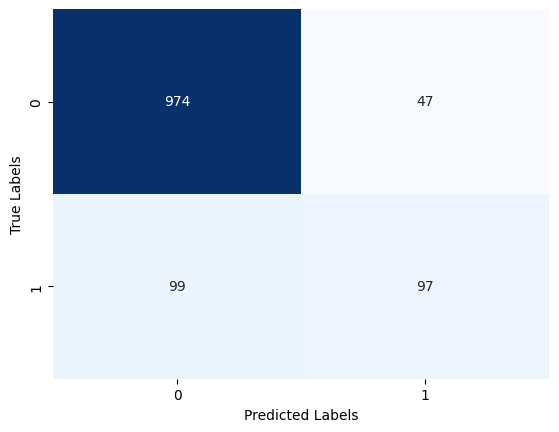

In [ ]:
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Check the model performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1021
           1       0.67      0.49      0.57       196

    accuracy                           0.88      1217
   macro avg       0.79      0.72      0.75      1217
weighted avg       0.87      0.88      0.87      1217



### predict with Alpha

In [ ]:
best_f1, best_alpha, cm  = AD_normal.findBestAlpha(X_valid, y_valid,covariance_matrix, mean_vector)

In [ ]:
best_alpha

0

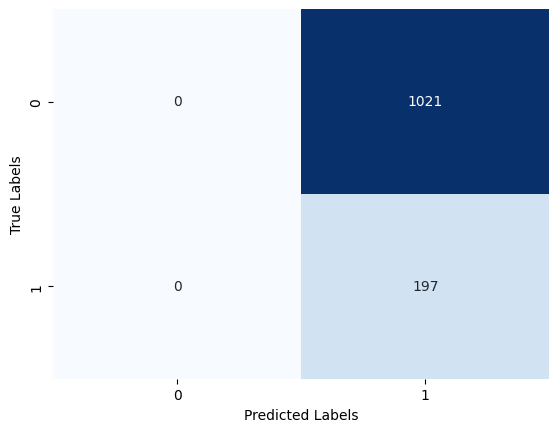

In [ ]:
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
y_pred = AD_normal.predictWithAlpha(LCVs_an, covariance_matrix, mean_vector, 249)

In [ ]:
cm = confusion_matrix(LCVs_an_y, y_pred)

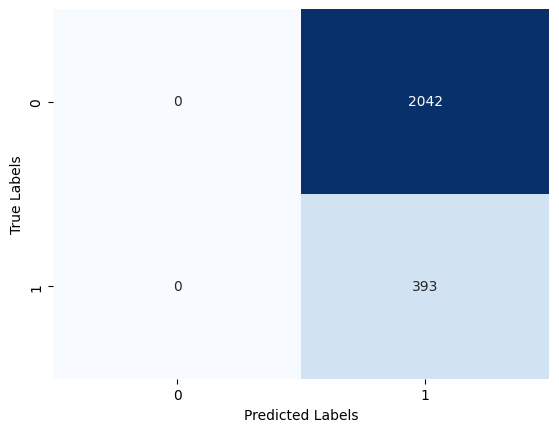

In [ ]:
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
pd.Series(LCVs_an_y).value_counts()

0    2042
1     393
dtype: int64

In [ ]:
pd.Series(y_pred).value_counts()

1    2435
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
# Check the model performance
print(classification_report(LCVs_an_y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2042
           1       0.16      1.00      0.28       393

    accuracy                           0.16      2435
   macro avg       0.08      0.50      0.14      2435
weighted avg       0.03      0.16      0.04      2435



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
# Check the model performance
print(classification_report(LCVs_an_y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2042
           1       0.16      1.00      0.28       393

    accuracy                           0.16      2435
   macro avg       0.08      0.50      0.14      2435
weighted avg       0.03      0.16      0.04      2435



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization

In [ ]:
LCVs_an_pdf = mvn.logpdf(LCVs_an)


### predict with Alpha

In [ ]:
# LCVs_an, LCVs_an_y
LCVs_an_pred  = AD_normal.predictWithAlpha(LCVs_an, covariance_matrix, mean_vector, best_alpha)

In [ ]:
LCVs_an_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


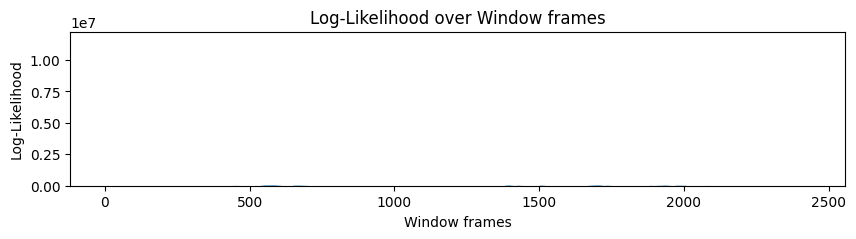

In [ ]:
# Define the range of parameter values to test
size = len(LCVs_an_pdf)
parameter_range = np.linspace(1, size, size)

plt.figure(figsize=(10, 2))
plt.plot(parameter_range, LCVs_an_pdf)
plt.xlabel('Window frames')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood over Window frames')
# Add a constant line at y = -2000
plt.axhline(y=best_epsilon, color='r', linestyle='--')
plt.ylim([-2500, None])
plt.show()